Dataset Shape: (891, 12)

Data Types and Non-Null Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary Statistics:
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique        

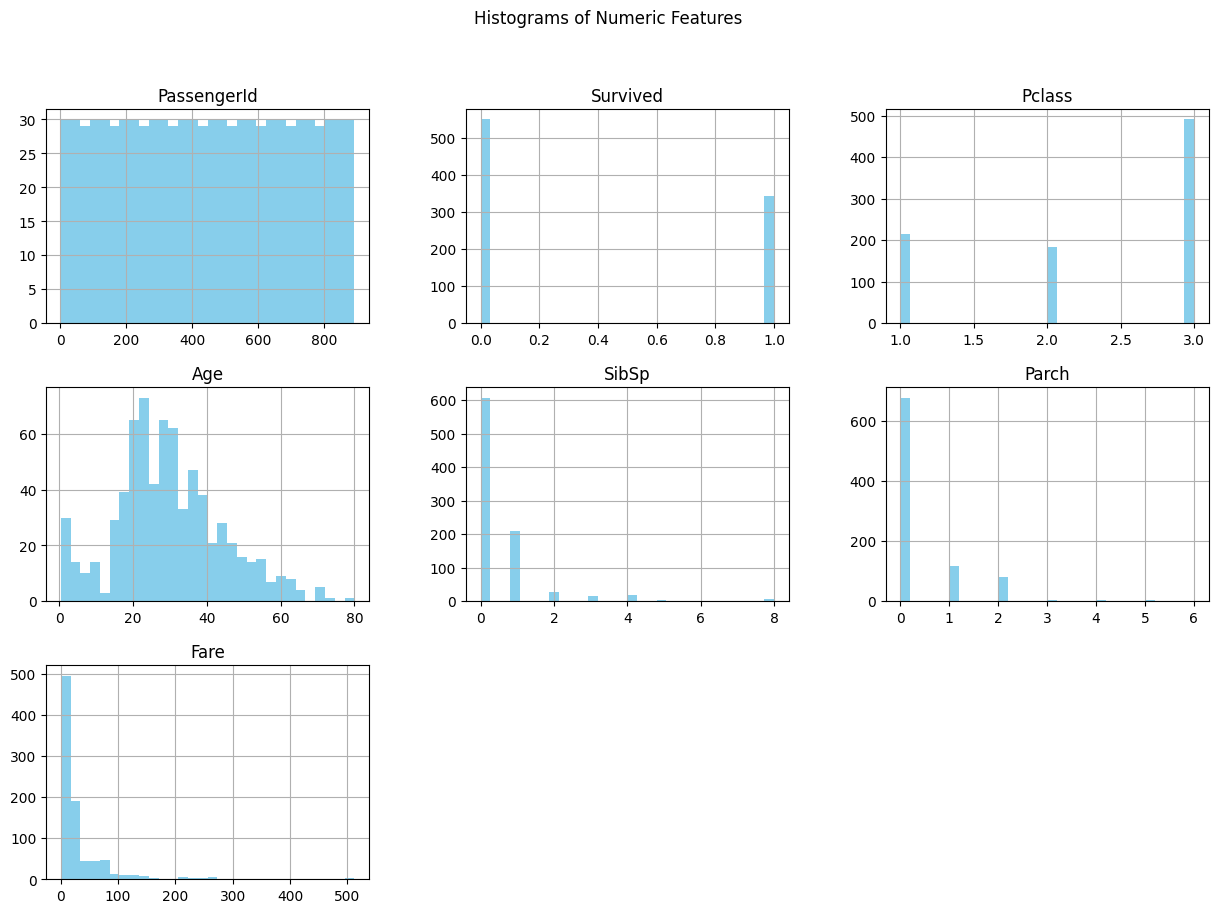

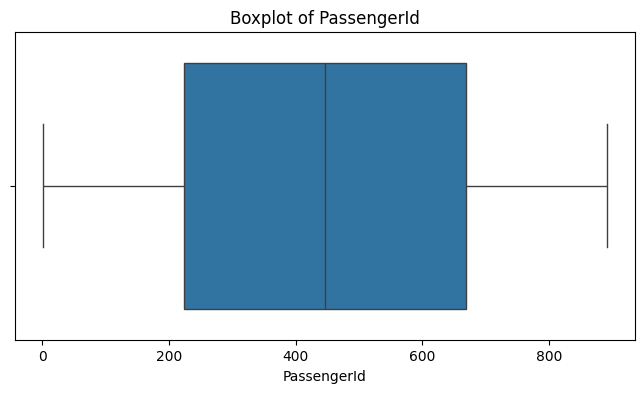

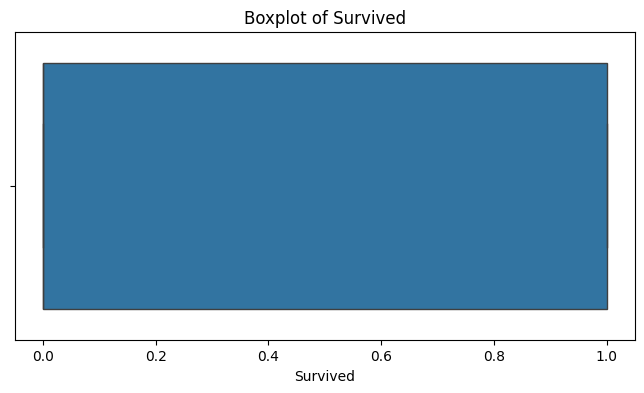

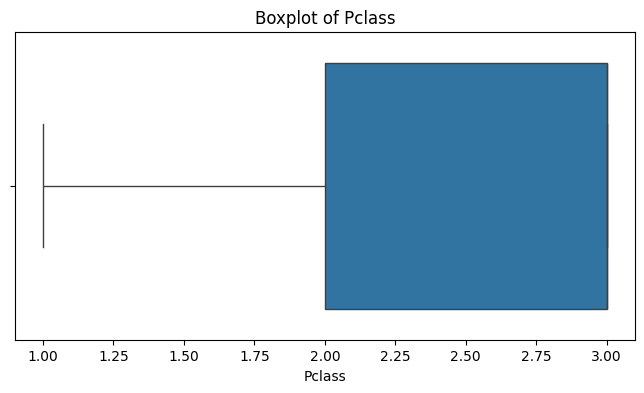

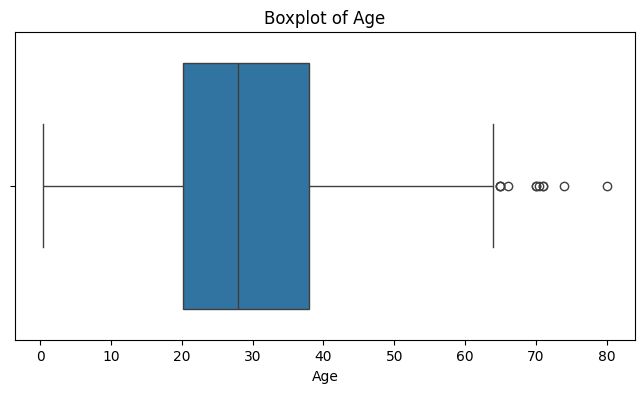

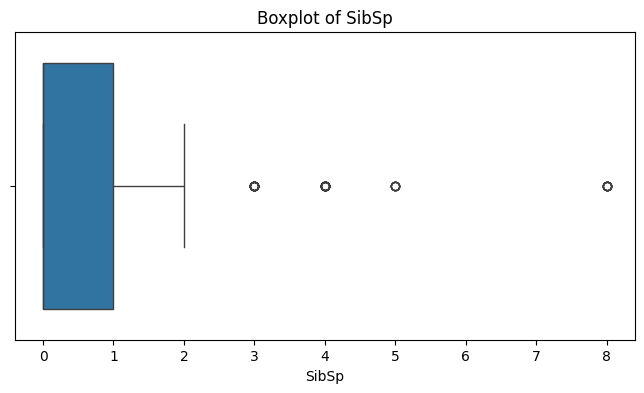

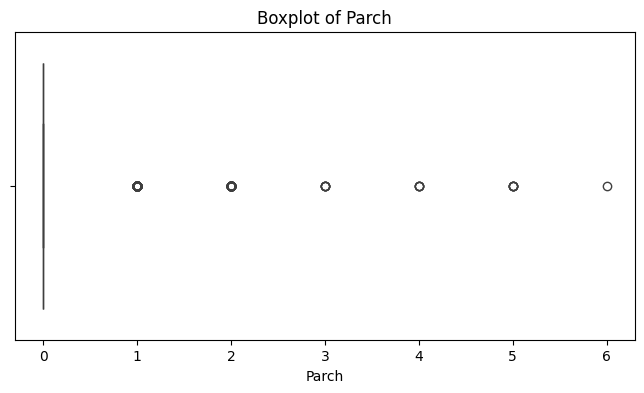

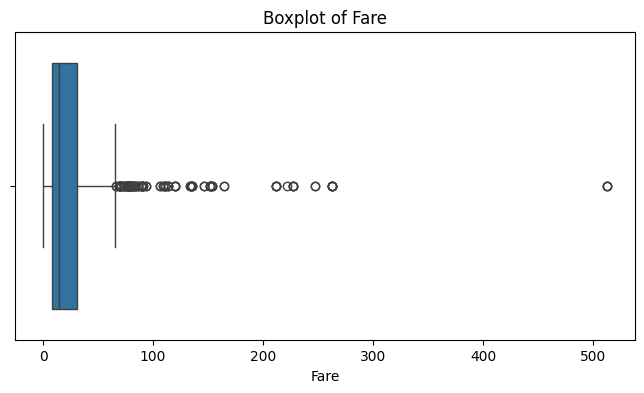

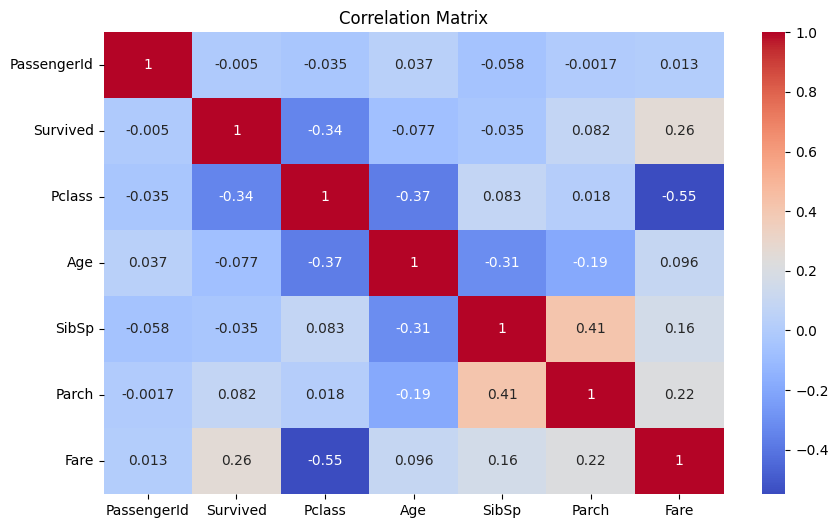

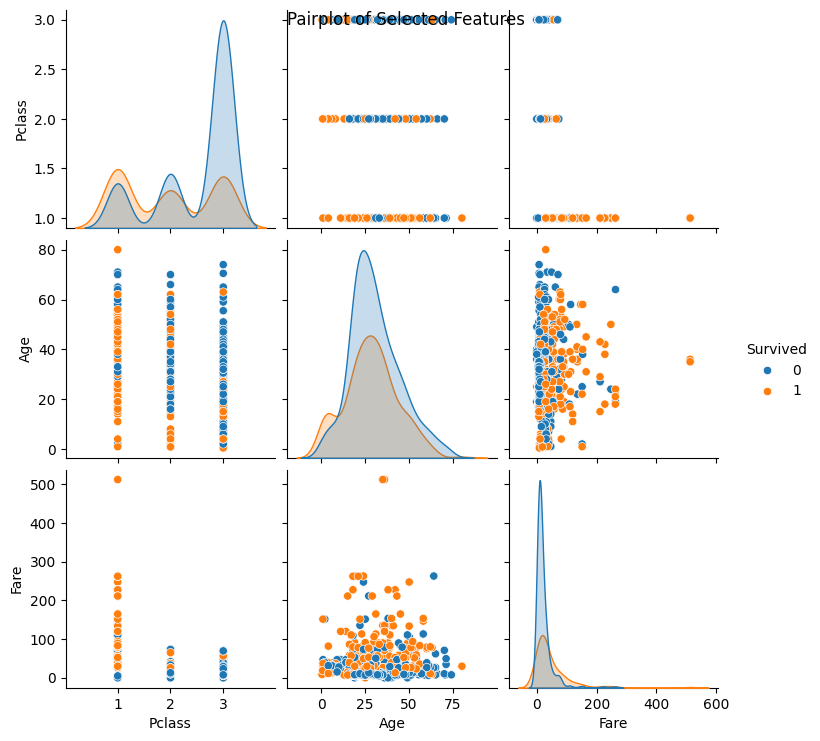

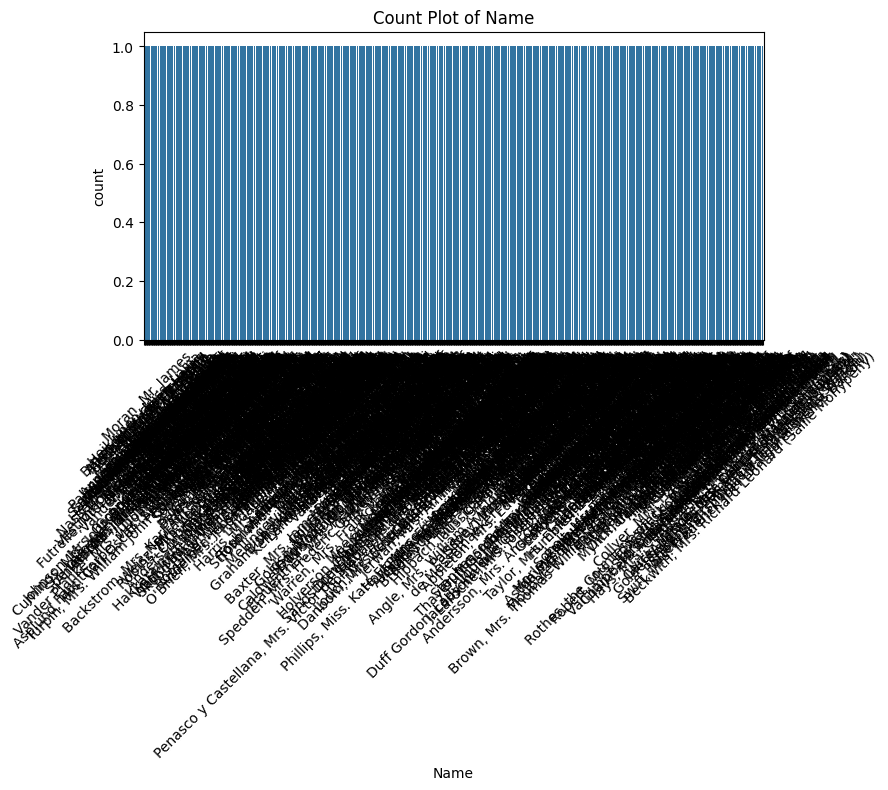

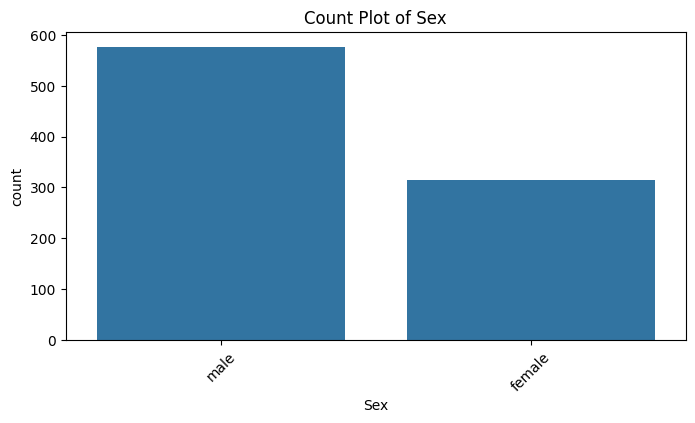

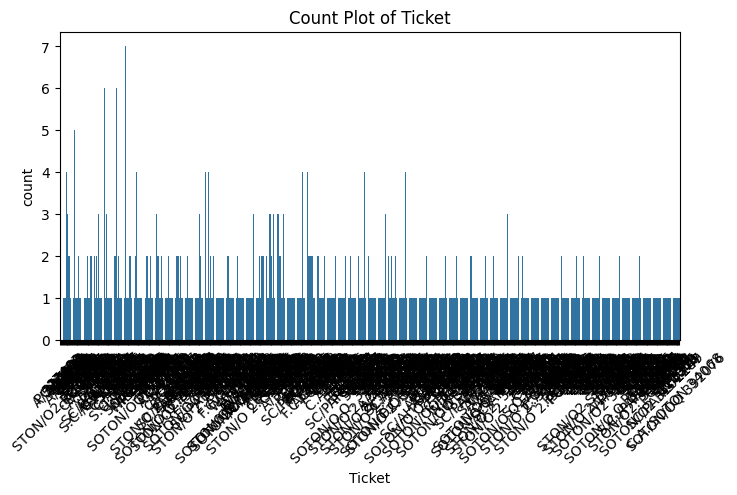

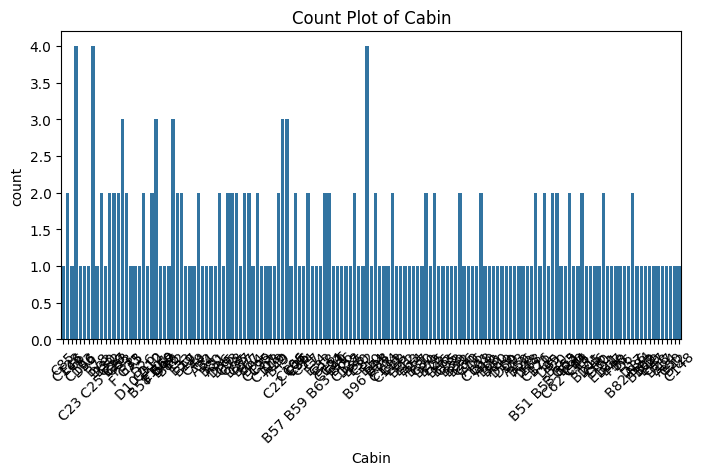

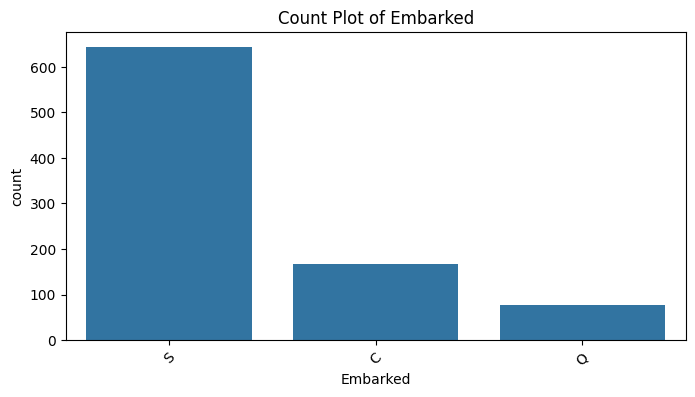


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


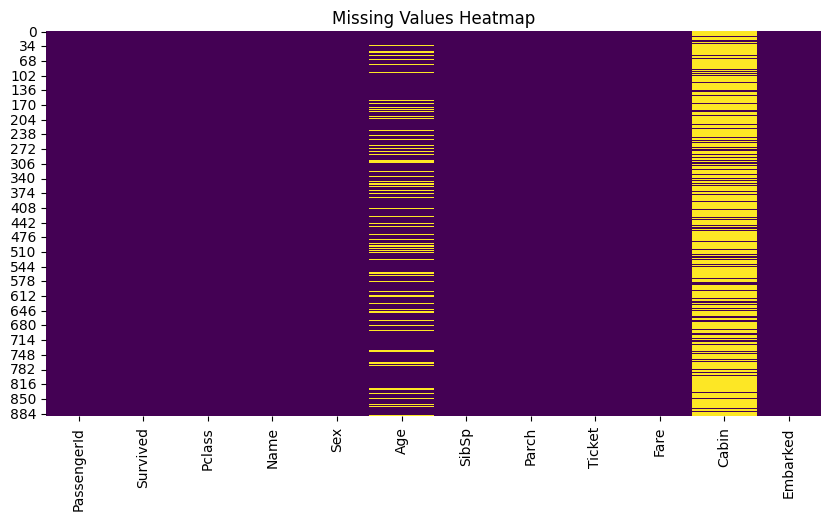


Skewness of Numeric Columns:
 Fare           4.787317
SibSp          3.695352
Parch          2.749117
Survived       0.478523
Age            0.389108
PassengerId    0.000000
Pclass        -0.630548
dtype: float64
Original Shape: (891, 12) → After Removing Fare Outliers: (775, 12)

 Observations & Inferences:
- Passengers in Pclass 3 had the highest mortality.
- Female passengers had a significantly higher survival rate.
- High Fare and younger age showed correlation with higher survival.
- Outliers are clearly present in 'Fare' and 'Age' columns.


In [4]:
# Titanic Dataset - Exploratory Data Analysis

# 1. Generate Summary Statistics (mean, median, std, etc.)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import skew

%matplotlib inline

df = pd.read_csv("/content/Titanic-Dataset.csv")

# Basic info
print("Dataset Shape:", df.shape)
print("\nData Types and Non-Null Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))

# 2. Create Histograms and Boxplots for Numeric Features

# Identify numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Histograms
df[numeric_cols].hist(bins=30, figsize=(15, 10), color='skyblue')
plt.suptitle("Histograms of Numeric Features")
plt.show()

# Boxplots
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# 3. Use Pairplot/Correlation Matrix for Feature Relationships

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Pairplot for selected important features
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')
plt.suptitle("Pairplot of Selected Features")
plt.show()

# 4. Identify Patterns, Trends, or Anomalies in the Data

# Visualize categorical features
categorical_cols = df.select_dtypes(include="object").columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

# Missing values
print("\nMissing Values:")
print(df.isnull().sum())
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# Detect skewness
skewed_cols = df[numeric_cols].skew().sort_values(ascending=False)
print("\nSkewness of Numeric Columns:\n", skewed_cols)

# 5. Make Basic Feature-Level Inferences from Visuals

# Handle outliers in 'Fare' (example)
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[(df['Fare'] >= (Q1 - 1.5 * IQR)) & (df['Fare'] <= (Q3 + 1.5 * IQR))]
print("Original Shape:", df.shape, "→ After Removing Fare Outliers:", df_cleaned.shape)

# Sample Inferences
print("\n Observations & Inferences:")
print("- Passengers in Pclass 3 had the highest mortality.")
print("- Female passengers had a significantly higher survival rate.")
print("- High Fare and younger age showed correlation with higher survival.")
print("- Outliers are clearly present in 'Fare' and 'Age' columns.")